Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

# Imports + data reading

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [186]:
hr_df=pd.read_csv("HR_comma_sep.csv")
hr_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


# Data analysis - influence of the factors for employees retention

In [187]:
hr_df[hr_df["left"]==1].drop(["Department", "salary"], axis="columns").mean()

satisfaction_level         0.440098
last_evaluation            0.718113
number_project             3.855503
average_montly_hours     207.419210
time_spend_company         3.876505
Work_accident              0.047326
left                       1.000000
promotion_last_5years      0.005321
dtype: float64

In [188]:
hr_df[hr_df["left"]==0].drop(["Department", "salary"], axis="columns").mean()

satisfaction_level         0.666810
last_evaluation            0.715473
number_project             3.786664
average_montly_hours     199.060203
time_spend_company         3.380032
Work_accident              0.175009
left                       0.000000
promotion_last_5years      0.026251
dtype: float64

In [189]:
hr_df[hr_df["left"]==1].drop(["Department", "salary"], axis="columns").median()

satisfaction_level         0.41
last_evaluation            0.79
number_project             4.00
average_montly_hours     224.00
time_spend_company         4.00
Work_accident              0.00
left                       1.00
promotion_last_5years      0.00
dtype: float64

In [190]:
hr_df[hr_df["left"]==0].drop(["Department", "salary"], axis="columns").median()

satisfaction_level         0.69
last_evaluation            0.71
number_project             4.00
average_montly_hours     198.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [191]:
hr_df.left.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

In [192]:
hr_df[hr_df["left"]==0].drop(["Department", "salary"], axis="columns").time_spend_company.value_counts()

time_spend_company
3     4857
2     3191
4     1667
5      640
6      509
10     214
7      188
8      162
Name: count, dtype: int64

In [193]:
hr_df[hr_df["left"]==1].salary.value_counts()

salary
low       2172
medium    1317
high        82
Name: count, dtype: int64

In [194]:
hr_df[hr_df["left"]==1].promotion_last_5years.value_counts()[1]/len(hr_df[hr_df["left"]==1])*100

np.float64(0.5320638476617194)

In [195]:
hr_df[hr_df["left"]==0].promotion_last_5years.value_counts()[1]/len(hr_df[hr_df["left"]==0])*100

np.float64(2.6251312565628284)

## Factors to be included in the classification model:
1. Satisfaction level,
2. time spend compnay, 
3. department,
4. salary,
5. promotion last 5 years

# Charts

# Department vs retention

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'sales'),
  Text(1, 0, 'technical'),
  Text(2, 0, 'support'),
  Text(3, 0, 'IT'),
  Text(4, 0, 'product_mng'),
  Text(5, 0, 'RandD'),
  Text(6, 0, 'marketing'),
  Text(7, 0, 'accounting'),
  Text(8, 0, 'management'),
  Text(9, 0, 'hr')])

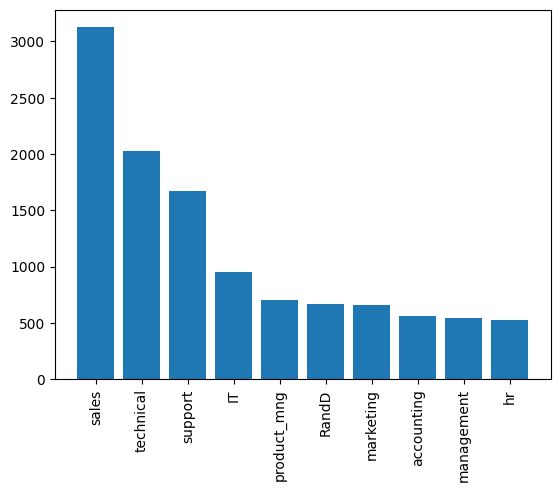

In [196]:
plt.bar(hr_df[hr_df["left"]==0].Department.value_counts().index, hr_df[hr_df["left"]==0].Department.value_counts().values)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'sales'),
  Text(1, 0, 'technical'),
  Text(2, 0, 'support'),
  Text(3, 0, 'IT'),
  Text(4, 0, 'hr'),
  Text(5, 0, 'accounting'),
  Text(6, 0, 'marketing'),
  Text(7, 0, 'product_mng'),
  Text(8, 0, 'RandD'),
  Text(9, 0, 'management')])

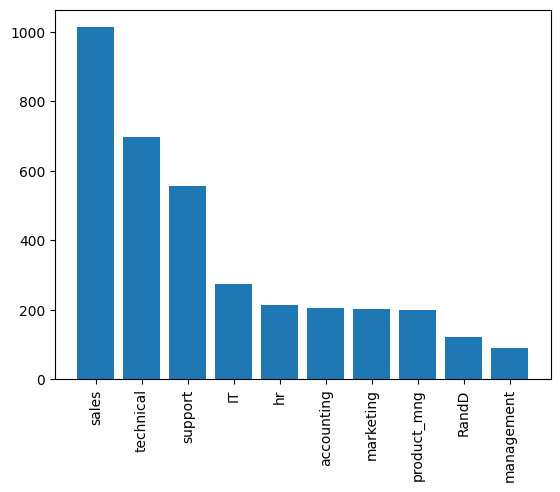

In [197]:
plt.bar(hr_df[hr_df["left"]==1].Department.value_counts().index, hr_df[hr_df["left"]==1].Department.value_counts().values)
plt.xticks(rotation=90)

In [198]:
departments_df=pd.DataFrame(data={"left": hr_df[hr_df["left"]==1].Department.value_counts(), "stay": hr_df[hr_df["left"]==0].Department.value_counts(), "overall":hr_df.Department.value_counts()})

In [199]:
departments_df["retention_ratio"]=departments_df.left/departments_df.overall

<Axes: xlabel='Department'>

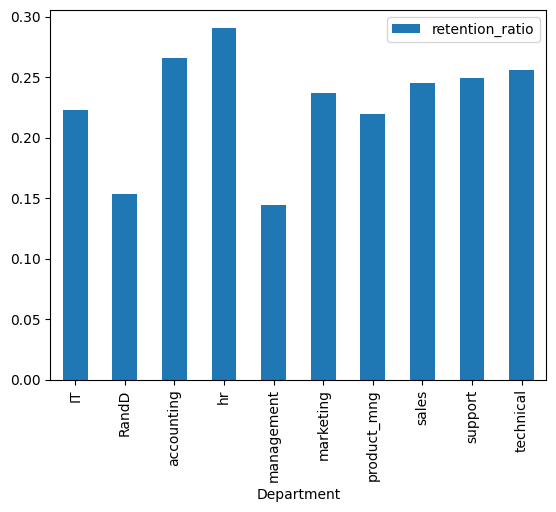

In [200]:
departments_df.drop(["left", "stay", "overall"], axis="columns").plot(kind="bar")

## Salary vs retention

<Axes: xlabel='salary,left'>

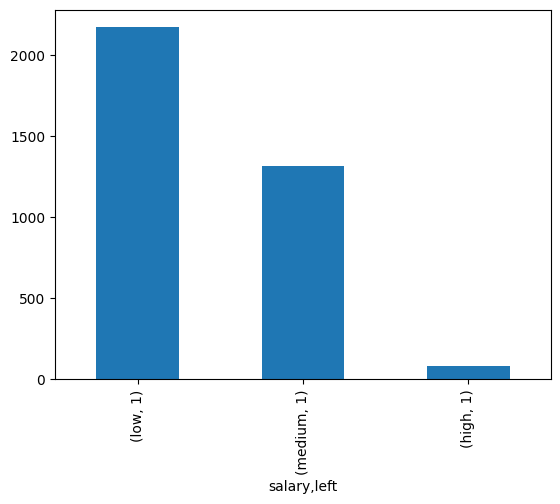

In [201]:
hr_df[["salary", "left"]][hr_df.left==1].value_counts().plot(kind="bar")

<Axes: xlabel='salary,left'>

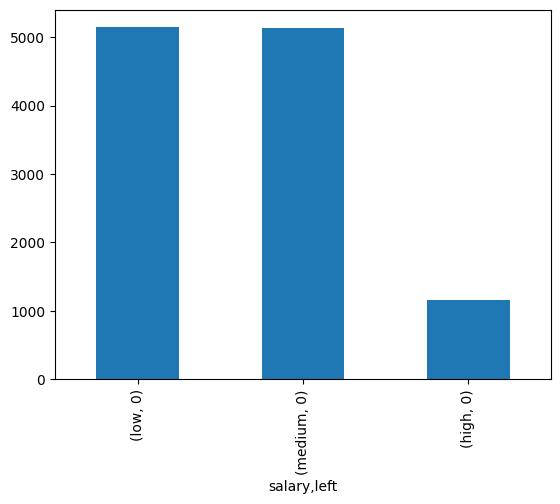

In [202]:
hr_df[["salary", "left"]][hr_df.left==0].value_counts().plot(kind="bar")

# Regression model

## Categorize string values

In [203]:
from sklearn.preprocessing import LabelEncoder
dep_le=LabelEncoder()
salary_le=LabelEncoder()

In [204]:
hr_df_le=hr_df
hr_df_le.Department=dep_le.fit_transform(hr_df_le.Department)
hr_df_le.salary=salary_le.fit_transform(hr_df_le.salary)

## Spliting data between train and tests

In [205]:
from sklearn.model_selection import train_test_split

In [206]:
hr_df_le

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


In [207]:
x_train, x_test, y_train, y_test=train_test_split(hr_df_le[["satisfaction_level", "average_montly_hours", "time_spend_company", "promotion_last_5years", "Department", "salary"]], hr_df_le.left, test_size=0.3)

## Logistic regression model

In [208]:
from sklearn.linear_model import LogisticRegression

In [209]:
model=LogisticRegression()

In [210]:
model.fit(x_train, y_train)

C:\Projekty\ml_basics\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Test score

In [211]:
model.score(x_test, y_test)

0.77